In [ ]:
import soccerdata as sd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

fbref = sd.FBref("ENG-Premier League", "2024-25")
player_stats = fbref.read_player_season_stats(stat_type="shooting")
player_stats.columns = player_stats.columns.droplevel(0)
player_stats = player_stats.reset_index()
player_stats.columns = ['league','season','team','player', 'nation', 'pos', 'age', 'born', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90',
                        'SoT/90', 'G/Sh','G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG','npxG/Sh', 'G-xG', 'np:G-xG']
player_stats = player_stats.drop(["league","season","team",'nation','born'], axis=1)

player_stats.head(10)

[12/21/25 16:31:23] INFO     Saving cached data to C:\Users\Yassine\soccerdata\data\FBref            ]8;id=840134;file://c:\Python310\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=999619;file://c:\Python310\lib\site-packages\soccerdata\_common.py#263\263]8;;\

,player,pos,age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Ben White,DF,26,13.3,0,9,2,22.2,0.68,0.15,...,0.0,19.4,0,0,0,0.5,0.5,0.05,-0.5,-0.5
1,Bukayo Saka,"FW,MF",22,19.2,6,66,22,33.3,3.44,1.15,...,0.23,15.6,1,1,1,6.8,6.0,0.09,-0.8,-1.0
2,David Raya,GK,28,38.0,0,0,0,<NA>,0.0,0.0,...,<NA>,<NA>,0,0,0,0.0,0.0,<NA>,0.0,0.0
3,Declan Rice,MF,25,31.4,4,48,14,29.2,1.53,0.45,...,0.29,19.6,2,0,0,3.5,3.5,0.07,0.5,0.5
4,Ethan Nwaneri,"FW,MF",17,9.9,4,24,9,37.5,2.41,0.91,...,0.44,18.5,1,0,0,1.2,1.2,0.05,2.8,2.8
5,Gabriel Jesus,FW,27,6.8,3,20,7,35.0,2.96,1.04,...,0.43,11.1,0,0,0,3.0,3.0,0.15,0.0,0.0
6,Gabriel Magalhães,DF,26,26.3,3,22,5,22.7,0.84,0.19,...,0.6,9.5,0,0,0,2.6,2.6,0.12,0.4,0.4
7,Gabriel Martinelli,"FW,MF",23,25.4,8,55,24,43.6,2.16,0.94,...,0.33,12.9,0,0,0,7.4,7.4,0.14,0.6,0.6
8,Jakub Kiwior,DF,24,12.5,1,3,1,33.3,0.24,0.08,...,1.0,18.5,0,0,0,0.2,0.2,0.06,0.8,0.8
9,Jorginho,MF,32,7.8,0,2,0,0.0,0.26,0.0,...,<NA>,23.2,0,0,0,0.1,0.1,0.03,-0.1,-0.1


In [73]:
#filter players who played more than 20 matches and drop goalkeepers
filtered_players = player_stats[player_stats['90s'] > 20]
filtered_players = filtered_players[filtered_players['pos'] != 'GK']
filtered_players = filtered_players.sort_values(by='90s', ascending=False)

filtered_players['goals_per_match'] = filtered_players['Gls'] / filtered_players['90s']
filtered_players['xg_per_match'] = filtered_players["xG"] / filtered_players['90s']

#fill NA values with 0
filtered_players = filtered_players.fillna(0)

filtered_players.head(20)

,player,pos,age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,goals_per_match,xg_per_match
101,Nathan Collins,DF,23,38.0,2,17,6,35.3,0.45,0.16,...,0,0,0,2.5,2.5,0.15,-0.5,-0.5,0.052632,0.065789
83,Bryan Mbeumo,FW,24,37.9,20,79,34,43.0,2.08,0.9,...,6,5,6,12.3,7.5,0.1,7.7,7.5,0.527704,0.324538
334,Mohamed Salah,FW,32,37.5,29,121,50,41.3,3.23,1.33,...,1,9,9,25.2,18.2,0.15,3.8,1.8,0.773333,0.672
157,Moisés Caicedo,"MF,DF",22,37.2,1,20,3,15.0,0.54,0.08,...,0,0,0,0.8,0.8,0.04,0.2,0.2,0.026882,0.021505
534,Max Kilman,DF,27,37.2,0,13,2,15.4,0.35,0.05,...,0,0,0,1.6,1.6,0.13,-1.6,-1.6,0.0,0.043011
75,Milos Kerkez,DF,20,37.1,2,19,5,26.3,0.51,0.13,...,0,0,0,0.6,0.5,0.03,1.4,1.5,0.053908,0.016173
337,Virgil van Dijk,DF,33,37.0,3,27,8,29.6,0.73,0.22,...,1,0,0,2.2,2.2,0.08,0.8,0.8,0.081081,0.059459
405,Dan Burn,DF,32,37.0,1,23,7,30.4,0.62,0.19,...,0,0,0,2.0,2.0,0.09,-1.0,-1.0,0.027027,0.054054
441,Nikola Milenković,DF,26,37.0,5,29,8,27.6,0.78,0.22,...,0,0,0,4.0,4.0,0.14,1.0,1.0,0.135135,0.108108
351,Joško Gvardiol,DF,22,36.4,5,40,12,30.0,1.1,0.33,...,0,0,0,4.6,4.3,0.11,0.4,0.7,0.137363,0.126374


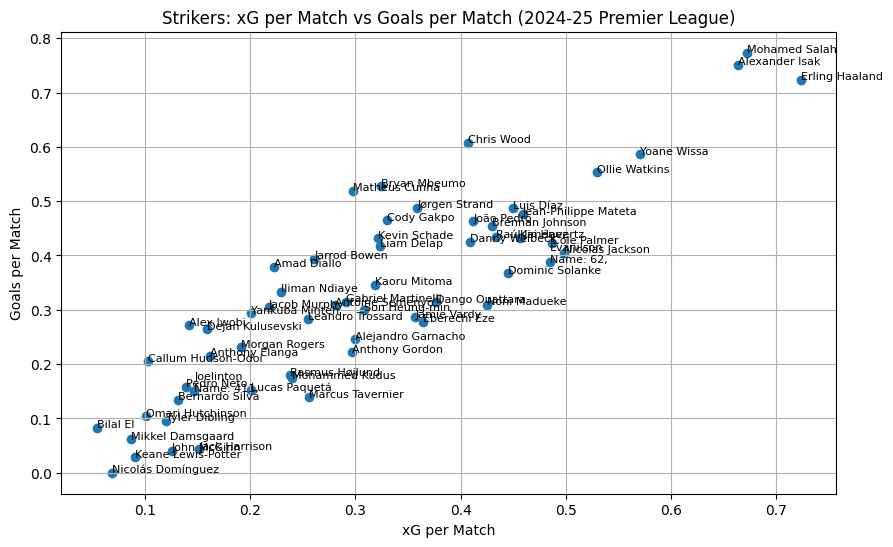

In [10]:
#lets analyze only strikers
strikers = filtered_players[filtered_players['pos'].str.contains('FW')]

#add goals per match column and Xg per match column
strikers['goals_per_match'] = strikers.Standard["Gls"] / strikers['90s']
strikers['xg_per_match'] = strikers.Expected["xG"] / strikers['90s']

#scatter plot of xg per match vs goals per match by player

plt.figure(figsize=(10,6))
plt.scatter(strikers['xg_per_match'], strikers['goals_per_match'])
for i, pl in strikers.iterrows():
    temp = str(pl.player).split(" ")[4:6]
    plt.text(pl['xg_per_match'], pl['goals_per_match'], temp[0] + " " + temp[1].split("\n")[0], fontsize=8)
plt.xlabel('xG per Match')
plt.ylabel('Goals per Match')   
plt.title('Strikers: xG per Match vs Goals per Match (2024-25 Premier League)')
plt.grid()  
plt.show()


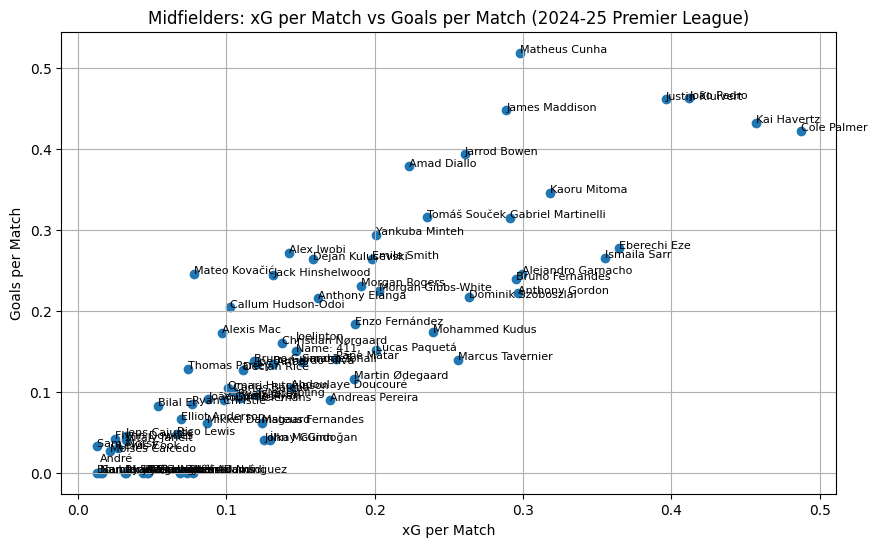

In [13]:
#lets do the same thing with midfielders
midfielders = filtered_players[filtered_players['pos'].str.contains('MF')] 
midfielders['goals_per_match'] = midfielders.Standard["Gls"] / midfielders['90s']
midfielders['xg_per_match'] = midfielders.Expected["xG"] / midfielders['90s']
plt.figure(figsize=(10,6))
plt.scatter(midfielders['xg_per_match'], midfielders['goals_per_match'])
for i, pl in midfielders.iterrows():
    temp = str(pl.player).split(" ")[4:6]
    plt.text(pl['xg_per_match'], pl['goals_per_match'], temp[0] + " " + temp[1].split("\n")[0], fontsize=8)
plt.xlabel('xG per Match')
plt.ylabel('Goals per Match')
plt.title('Midfielders: xG per Match vs Goals per Match (2024-25 Premier League)')
plt.grid()
plt.show()


## Shots Quality

In [82]:
#create a dataframe of shots column only

shots_df = filtered_players[['player','Gls','Sh', 'SoT', 'SoT%','G/Sh','G/SoT','Dist','FK','Sh/90','SoT/90',
                              'xG', 'npxG','npxG/Sh',"goals_per_match","xg_per_match"]]

In [83]:
shots_df.head()

,player,Gls,Sh,SoT,SoT%,G/Sh,G/SoT,Dist,FK,Sh/90,SoT/90,xG,npxG,npxG/Sh,goals_per_match,xg_per_match
101,Nathan Collins,2,17,6,35.3,0.12,0.33,10.7,0,0.45,0.16,2.5,2.5,0.15,0.052632,0.065789
83,Bryan Mbeumo,20,79,34,43.0,0.19,0.44,17.9,6,2.08,0.9,12.3,7.5,0.1,0.527704,0.324538
334,Mohamed Salah,29,121,50,41.3,0.17,0.4,14.5,1,3.23,1.33,25.2,18.2,0.15,0.773333,0.672
157,Moisés Caicedo,1,20,3,15.0,0.05,0.33,25.3,0,0.54,0.08,0.8,0.8,0.04,0.026882,0.021505
534,Max Kilman,0,13,2,15.4,0.0,0.0,8.9,0,0.35,0.05,1.6,1.6,0.13,0.0,0.043011


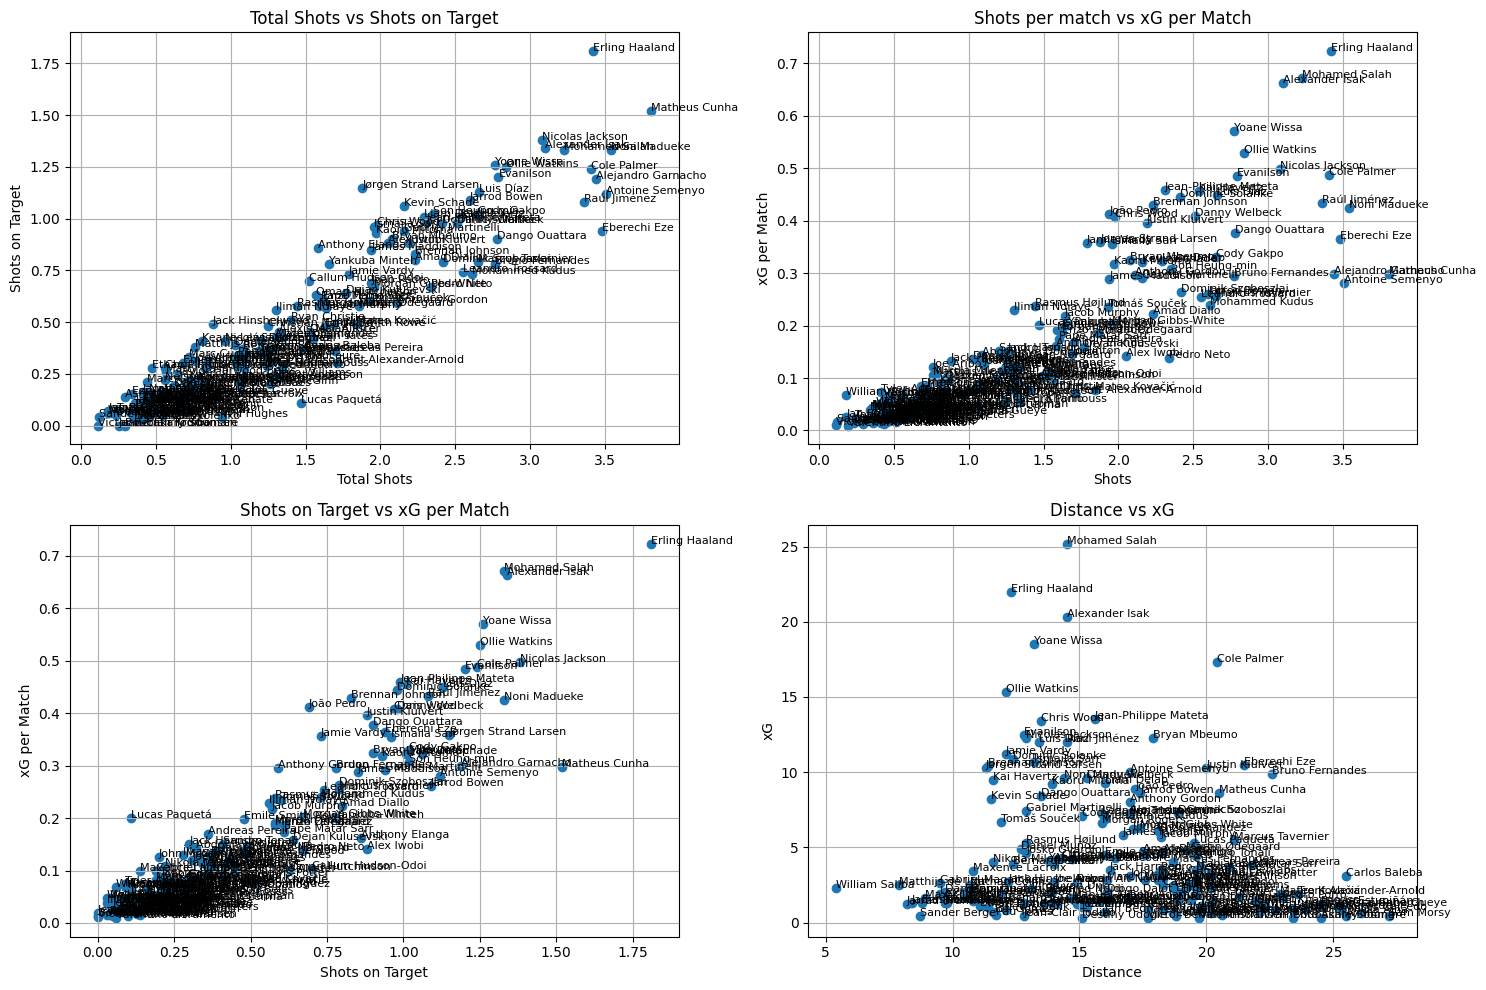

In [84]:
#lets create a chart with multiple plots total shots vs shots on target, total shots vs xg, shots on target vs xg, distance vs xg by player
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter(shots_df['Sh/90'], shots_df['SoT/90'])
for i, pl in shots_df.iterrows():
    plt.text(pl['Sh/90'], pl['SoT/90'], pl['player'], fontsize=8)
plt.xlabel('Total Shots')
plt.ylabel('Shots on Target')
plt.title('Total Shots vs Shots on Target')
plt.grid()
plt.subplot(2,2,2)
plt.scatter(shots_df['Sh/90'], shots_df['xg_per_match'])
for i, pl in shots_df.iterrows():
    plt.text(pl['Sh/90'], pl['xg_per_match'], pl['player'], fontsize=8)
plt.xlabel('Shots')
plt.ylabel('xG per Match')
plt.title('Shots per match vs xG per Match')
plt.grid()
plt.subplot(2,2,3)
plt.scatter(shots_df['SoT/90'], shots_df['xg_per_match'])
for i, pl in shots_df.iterrows():
    plt.text(pl['SoT/90'], pl['xg_per_match'], pl['player'], fontsize=8)
plt.xlabel('Shots on Target')
plt.ylabel('xG per Match')
plt.title('Shots on Target vs xG per Match')
plt.grid()
plt.subplot(2,2,4)
plt.scatter(shots_df['Dist'], shots_df['xG'])
for i, pl in shots_df.iterrows():
    plt.text(pl['Dist'], pl['xG'], pl['player'], fontsize=8)
plt.xlabel('Distance')
plt.ylabel('xG')
plt.title('Distance vs xG')
plt.grid()
plt.tight_layout()
plt.show()

